In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def corriente(t, i_parameter):
    # Corriente en nA.
    if i_parameter == '0':
        return np.zeros(np.shape(t)[0])
    
    if i_parameter == '1':
        corriente_arr = np.zeros(np.shape(t)[0])       
        for index in range(np.shape(t)[0]):
            if t[index] > 10:
                corriente_arr[index] = 10
        return corriente_arr
    
    if i_parameter == '2':
        corriente_arr = np.zeros(np.shape(t)[0])       
        for index in range(np.shape(t)[0]):
            if t[index] < 10:
                corriente_arr[index] = -30
        return corriente_arr
    
    if i_parameter == '3':
        corriente_arr = np.zeros(np.shape(t)[0])       
        for index in range(np.shape(t)[0]):
            if t[index] > 10:
                corriente_arr[index] = 0.2
                if (t[index] > 100) and (t[index] < 105):
                    corriente_arr[index] = 2
        return corriente_arr
    
    if i_parameter == '4':
        corriente_arr = np.zeros(np.shape(t)[0])       
        for index in range(np.shape(t)[0]):
            if t[index] > 10:
                corriente_arr[index] = 0.8
        return corriente_arr
    
    else:
        return np.zeros(np.shape(t)[0]) - float(i_parameter)

In [3]:
def function(x, t, parameters, corriente_val):
    # parameters[0] = a, parameters[1] = b
    # parameters[2] = c, parameters[3] = d, parameters[4] = v_umbral = 30.
    v_dot = 0.04*x[0]*x[0] + 5*x[0] + 140 - x[1] + corriente_val
    u_dot = parameters[0]*(parameters[1]*x[0] - x[1])
    return np.array([v_dot, u_dot])

In [4]:
def runge_kuta_4(function, parameters, x_0, t_0, t_f, corriente, i_parameter, steps = 200*20):
    x = np.zeros((steps + 1, 2))
    x[0] = x_0
    t = np.linspace(t_0, t_f, num=steps+1, endpoint=True)
    step = t[1] - t[0]
    
    corriente_arr = corriente(t, i_parameter)
    
    for i in range(0, steps):
        k_1 = function(x[i], t[i], parameters, corriente_arr[i])
        k_2 = function(x[i] + step*k_1/2, t[i] + step/2, parameters, corriente_arr[i])
        k_3 = function(x[i] + step*k_2/2, t[i] + step/2, parameters, corriente_arr[i])
        k_4 = function(x[i] + step*k_3, t[i] + step, parameters, corriente_arr[i])
        
        x[i+1] = x[i] + step*(k_1 + 2*k_2 + 2*k_3 + k_4)/6
        
        if x[i+1][0] > parameters[4]:
            x[i+1][0] = parameters[2]
            x[i+1][1] += parameters[3] 
    
    return x, t, corriente_arr

In [5]:
# parameters[0] = a, parameters[1] = b, parameters[2] = c, parameters[3] = d, parameters[4] = v_umbral = 30.
parameters = np.array([0.02, 0.25, -65, 0.5, 30])
V_0, t, i = runge_kuta_4(function, parameters, [-63, -63*parameters[1]], 0, 500, corriente, '30', steps = 200*20)

V_0 = V_0[np.shape(V_0)[0] - 1]

In [6]:
V_0

array([-87.22087674, -21.80513103])

In [7]:
parameters = np.array([0.02, 0.25, -65, 0.5, 30])
V, t, i = runge_kuta_4(function, parameters, V_0, 0, 200, corriente, '2', steps = 200*200)

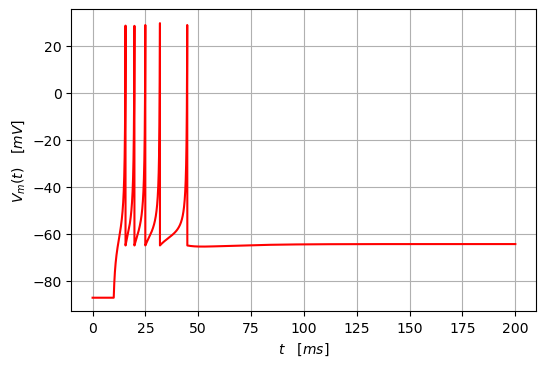

In [8]:
#plt.rcParams["figure.figsize"] = (4,2.5)
plt.rcParams["figure.figsize"] = (6,4)
plt.rcParams['figure.dpi'] = 100

#plt.plot(t, i, 'r-', markersize=1.5)
plt.plot(t, V[:,0], 'r-', markersize=1.5)

plt.xlabel(r'$t \quad [ms]$')
plt.ylabel(r'$V_m(t) \quad [mV]$')

plt.grid(True)
plt.show()

# Panel 1.

In [9]:
# parameters[0] = a, parameters[1] = b, parameters[2] = c, parameters[3] = d, parameters[4] = v_umbral = 30.
parameters = np.array([0.02, 0.2, -65, 8, 30])
V_0, t, i = runge_kuta_4(function, parameters, [-63, -63*parameters[1]], 0, 500, corriente, '0', steps = 200*20)

V_0 = V_0[np.shape(V_0)[0] - 1]

#V_0 = array([-70.0000037 , -13.99999788])

parameters = np.array([0.02, 0.2, -65, 8, 30])
V1, t1, i1 = runge_kuta_4(function, parameters, V_0, 0, 200, corriente, '1', steps = 200*200)

# Panel 2.

In [10]:
# parameters[0] = a, parameters[1] = b, parameters[2] = c, parameters[3] = d, parameters[4] = v_umbral = 30.
parameters = np.array([0.02, 0.2, -55, 4, 30])
V_0, t, i = runge_kuta_4(function, parameters, [-63, -63*parameters[1]], 0, 500, corriente, '0', steps = 200*20)

V_0 = V_0[np.shape(V_0)[0] - 1]

#V_0 = array([-70.0000037 , -13.99999788])

parameters = np.array([0.02, 0.2, -55, 4, 30])
V2, t2, i2 = runge_kuta_4(function, parameters, V_0, 0, 200, corriente, '1', steps = 200*200)

# Panel 3.

In [11]:
# parameters[0] = a, parameters[1] = b, parameters[2] = c, parameters[3] = d, parameters[4] = v_umbral = 30.
parameters = np.array([0.02, 0.2, -50, 2, 30])
V_0, t, i = runge_kuta_4(function, parameters, [-63, -63*parameters[1]], 0, 500, corriente, '0', steps = 200*20)

V_0 = V_0[np.shape(V_0)[0] - 1]

#V_0 = array([-70.0000037 , -13.99999788])

parameters = np.array([0.02, 0.2, -50, 2, 30])
V3, t3, i3 = runge_kuta_4(function, parameters, V_0, 0, 220, corriente, '1', steps = 200*200)

# Panel 4.

In [12]:
# parameters[0] = a, parameters[1] = b, parameters[2] = c, parameters[3] = d, parameters[4] = v_umbral = 30.
parameters = np.array([0.1, 0.2, -65, 2, 30])
V_0, t, i = runge_kuta_4(function, parameters, [-63, -63*parameters[1]], 0, 500, corriente, '0', steps = 200*20)

V_0 = V_0[np.shape(V_0)[0] - 1]

#V_0 = array([-70., -14.])

parameters = np.array([0.1, 0.2, -65, 2, 30])
V4, t4, i4 = runge_kuta_4(function, parameters, V_0, 0, 200, corriente, '1', steps = 200*200)

# Panel 5.

In [13]:
# parameters[0] = a, parameters[1] = b, parameters[2] = c, parameters[3] = d, parameters[4] = v_umbral = 30.
parameters = np.array([0.02, 0.25, -65, 0.05, 30])
V_0, t, i = runge_kuta_4(function, parameters, [-63, -63*parameters[1]], 0, 500, corriente, '0', steps = 200*20)

V_0 = V_0[np.shape(V_0)[0] - 1]

#V_0 = array([-64.41391109, -16.10347777])

parameters = np.array([0.02, 0.25, -65, 0.05, 30])
V5, t5, i5 = runge_kuta_4(function, parameters, V_0, 0, 200, corriente, '4', steps = 200*200)

# Panel 6.

In [14]:
# parameters[0] = a, parameters[1] = b, parameters[2] = c, parameters[3] = d, parameters[4] = v_umbral = 30.
parameters = np.array([0.02, 0.25, -65, 0.5, 30])
V_0, t, i = runge_kuta_4(function, parameters, [-63, -63*parameters[1]], 0, 500, corriente, '30', steps = 200*20)

V_0 = V_0[np.shape(V_0)[0] - 1]

#V_0 = array([-87.22087674, -21.80513103])

parameters = np.array([0.02, 0.25, -65, 0.5, 30])
V6, t6, i6 = runge_kuta_4(function, parameters, V_0, 0, 200, corriente, '2', steps = 200*200)

# Panel 7.

In [15]:
# parameters[0] = a, parameters[1] = b, parameters[2] = c, parameters[3] = d, parameters[4] = v_umbral = 30.
parameters = np.array([0.1, 0.26, -65, 2, 30])
V_0, t, i = runge_kuta_4(function, parameters, [-63, -63*parameters[1]], 0, 500, corriente, '0', steps = 200*20)

V_0 = V_0[np.shape(V_0)[0] - 1]

#V_0 = array([-62.5 , -16.25])

parameters = np.array([0.1, 0.26, -65, 2, 30])
V7, t7, i7 = runge_kuta_4(function, parameters, V_0, 0, 200, corriente, '3', steps = 200*200)

# Panel 8.

In [16]:
# parameters[0] = a, parameters[1] = b, parameters[2] = c, parameters[3] = d, parameters[4] = v_umbral = 30.
parameters = np.array([0.1, 0.2355, -65, 2, 30])
V_0, t, i = runge_kuta_4(function, parameters, [-63, -63*parameters[1]], 0, 500, corriente, '0', steps = 200*20)

V_0 = V_0[np.shape(V_0)[0] - 1]

#V_0 = array([-66.40803182, -15.63909149])

parameters = np.array([0.02, 0.25, -65, 2, 30])
V8, t8, i8 = runge_kuta_4(function, parameters, V_0, 0, 200, corriente, '1', steps = 200*200)

# Figure.

(-1.0, 11.0)

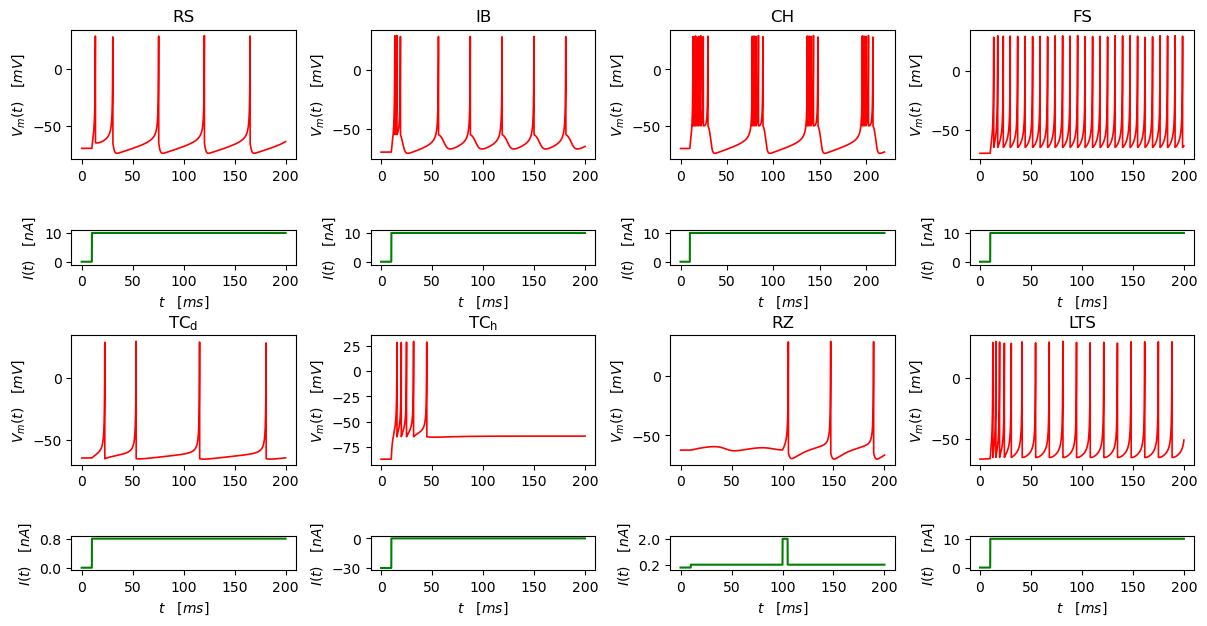

In [18]:
fig, ax = plt.subplots(4, 4, gridspec_kw={'height_ratios':[3, 0.8, 3, 0.8]})
fig.set_size_inches(12,6)
fig.set_dpi(100)
fig.tight_layout(h_pad=3, w_pad=2)
#fig.tight_layout()

#########
#Panel 1#
#########
ax[0, 0].plot(t1, V1[:,0], 'r-', linewidth=1.2)
ax[0, 0].set_title("RS")
ax[0, 0].set_ylabel(r'$V_m(t) \quad [mV]$')

ax[1, 0].plot(t1, i1, 'g-', markersize=1)
ax[1, 0].set_ylabel(r'$I(t) \quad [nA]$')
ax[1, 0].set_xlabel(r'$t \quad [ms]$')
ax[1, 0].set_ylim([-1, 11])

#########
#Panel 2#
#########
ax[0, 1].plot(t2, V2[:,0], 'r-', linewidth=1.2)
ax[0, 1].set_title("IB")
ax[0, 1].set_ylabel(r'$V_m(t) \quad [mV]$')

ax[1, 1].plot(t2, i2, 'g-', markersize=1)
ax[1, 1].set_ylabel(r'$I(t) \quad [nA]$')
ax[1, 1].set_xlabel(r'$t \quad [ms]$')
ax[1, 1].set_ylim([-1, 11])

#########
#Panel 3#
#########
ax[0, 2].plot(t3, V3[:,0], 'r-', linewidth=1.2)
ax[0, 2].set_title("CH")
ax[0, 2].set_ylabel(r'$V_m(t) \quad [mV]$')

ax[1, 2].plot(t3, i3, 'g-', markersize=1)
ax[1, 2].set_ylabel(r'$I(t) \quad [nA]$')
ax[1, 2].set_xlabel(r'$t \quad [ms]$')
ax[1, 2].set_ylim([-1, 11])

#########
#Panel 4#
#########
ax[0, 3].plot(t4, V4[:,0], 'r-', linewidth=1.2)
ax[0, 3].set_title("FS")
ax[0, 3].set_ylabel(r'$V_m(t) \quad [mV]$')

ax[1, 3].plot(t4, i4, 'g-', markersize=1)
ax[1, 3].set_ylabel(r'$I(t) \quad [nA]$')
ax[1, 3].set_xlabel(r'$t \quad [ms]$')
ax[1, 3].set_ylim([-1, 11])

#########
#Panel 5#
#########
ax[2, 0].plot(t5, V5[:,0], 'r-', linewidth=1.2)
ax[2, 0].set_title(r'$\mathregular{TC_d}$')
ax[2, 0].set_ylabel(r'$V_m(t) \quad [mV]$')

ax[3, 0].plot(t5, i5, 'g-', markersize=1)
ax[3, 0].set_ylabel(r'$I(t) \quad [nA]$')
ax[3, 0].set_xlabel(r'$t \quad [ms]$')
ax[3, 0].set_ylim([-0.075, 0.875])
ax[3, 0].set_yticks([0.0, 0.8])

#########
#Panel 6#
#########
ax[2, 1].plot(t6, V6[:,0], 'r-', linewidth=1.2)
ax[2, 1].set_title(r'$\mathregular{TC_h}$')
ax[2, 1].set_ylabel(r'$V_m(t) \quad [mV]$')
ax[2, 1].set_yticks([-75, -50, -25, 0, 25])

ax[3, 1].plot(t6, i6, 'g-', markersize=1)
ax[3, 1].set_ylabel(r'$I(t) \quad [nA]$')
ax[3, 1].set_xlabel(r'$t \quad [ms]$')
ax[3, 1].set_ylim([-32.5, 2.5])
ax[3, 1].set_yticks([-30, 0])

#########
#Panel 7#
#########
ax[2, 2].plot(t7, V7[:,0], 'r-', linewidth=1.2)
ax[2, 2].set_title("RZ")
ax[2, 2].set_ylabel(r'$V_m(t) \quad [mV]$')
#ax[2, 2].set_yticks([-75, -50, -25, 0, 25])

ax[3, 2].plot(t7, i7, 'g-', markersize=1)
ax[3, 2].set_ylabel(r'$I(t) \quad [nA]$')
ax[3, 2].set_xlabel(r'$t \quad [ms]$')
ax[3, 2].set_ylim([-0.2, 2.2])
ax[3, 2].set_yticks([0.2, 2])

#########
#Panel 8#
#########
ax[2, 3].plot(t8, V8[:,0], 'r-', linewidth=1.2)
ax[2, 3].set_title("LTS")
ax[2, 3].set_ylabel(r'$V_m(t) \quad [mV]$')
#ax[2, 3].set_yticks([-75, -50, -25, 0, 25])

ax[3, 3].plot(t8, i8, 'g-', markersize=1)
ax[3, 3].set_ylabel(r'$I(t) \quad [nA]$')
ax[3, 3].set_xlabel(r'$t \quad [ms]$')
ax[3, 3].set_ylim([-1, 11])
#ax[3, 3].set_yticks([0.2, 2])

